# Performance Metrics

In [1]:
from math import sqrt
from typing import List
from itertools import combinations

import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

In [2]:
# Globals
RED = '#ef4123'

## Classification Performance Metrics

In [3]:
actual_values = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
predictions =   [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]

### Confusion Matrix

In [4]:
print(metrics.confusion_matrix(actual_values, predictions))

[[3 3]
 [1 3]]


### Complete Classification Report

In [5]:
print(metrics.classification_report(actual_values, predictions))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10



### Accuracy Score

In [6]:
print(f'Accuracy Score is: {metrics.accuracy_score(actual_values, predictions) * 100} % ')

Accuracy Score is: 60.0 % 


### Precision Score

In [7]:
print(f'Precision Score is: {metrics.precision_score(actual_values, predictions)}')

Precision Score is: 0.5


### Recall Score

In [8]:
print(f'Recall Score is: {metrics.recall_score(actual_values, predictions)}')

Recall Score is: 0.75


### Precision - Recall Curve

In [9]:
data = pd.read_csv('./data/penguins_size.csv')

data = data.dropna()
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)
data = data[data['species'] != 'Chinstrap']

X = data.drop(['species'], axis=1).values

y = data['species']
spicies = {'Adelie': -1, 'Gentoo': 1}
y = [spicies[item] for item in y]
y = np.array(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

dt_model = DecisionTreeClassifier(max_depth=1)
dt_model.fit(X_train, y_train)
dt_preditions = dt_model.predict(X_test)

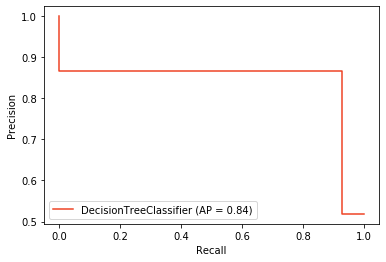

In [10]:
disp = metrics.plot_precision_recall_curve(dt_model, X_test, y_test, color=RED)

### F1 Score

In [11]:
print('F1 Score:', metrics.f1_score(actual_values, predictions))

F1 Score: 0.6


### AUC-ROC

In [12]:
data = pd.read_csv('./data/penguins_size.csv')

data = data.dropna()
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)
data = data[data['species'] != 'Chinstrap']

X = data.drop(['species'], axis=1).values

y = data['species']
spicies = {'Adelie': -1, 'Gentoo': 1}
y = [spicies[item] for item in y]
y = np.array(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

dt_model = DecisionTreeClassifier(max_depth=1)
dt_model.fit(X_train, y_train)
dt_preditions = dt_model.predict(X_test)

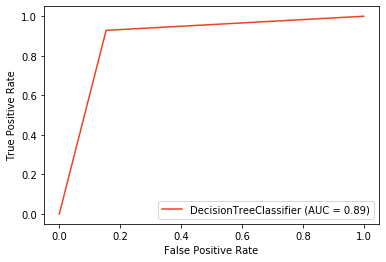

In [13]:
metrics.plot_roc_curve(dt_model, X_test, y_test, color = RED)

In [14]:
print('AUC-ROC:', metrics.roc_auc_score(actual_values, predictions))

AUC-ROC: 0.625


### LOGLOSS

In [15]:
print('LOGLOSS:', metrics.log_loss(actual_values, predictions))

LOGLOSS: 13.815750437193334


## Regression Performance Metrics

In [16]:
actual_values =    [9, -3.3, 6, 11]
predictions = [8.5, -2.9, 6, 9.2]

### Mean Absolute Error - MAE

In [17]:
print (f'MAE: {metrics.mean_absolute_error(actual_values, predictions)}')

MAE: 0.6750000000000002


### Mean Squared Error - MSE

In [18]:
print (f'MSE: {metrics.mean_squared_error(actual_values, predictions)}')

MSE: 0.9125000000000005


### Root Mean Squared Error - RMSE

In [19]:
def rmse(actual_values, predictions):
    actual_values = np.asarray(actual_values)
    predictions = np.asarray(predictions)
    return np.sqrt(((predictions - actual_values) ** 2).mean())

In [20]:
print(f'RMSE: {rmse(actual_values, predictions)}')

RMSE: 0.9552486587271403


In [21]:
print(f'RMSE: {sqrt(metrics.mean_squared_error(actual_values, predictions))}')

RMSE: 0.9552486587271403


### Root Mean Squared Logarithmic Error - RMSLE

In [22]:
actual_values_ranged = minmax_scale(actual_values, feature_range=(0,1))
predictions_ranged = minmax_scale(predictions, feature_range=(0,1))

print(f'RMSLE: {sqrt(metrics.mean_squared_log_error(actual_values_ranged, predictions_ranged))}')

RMSLE: 0.033145260915431275


### R Squared

In [23]:
print (f'R Squared: {metrics.r2_score(actual_values, predictions)}')

R Squared: 0.9696004330897203
